# Modelling and Evaluation

## Objectives

* Create an ML model that can diferentiate between the 100 species of butterflies and moths within the dataset.

## Inputs

* inputs/butterfly_moth/images/test
* inputs/butterfly_moth/images/validation
* inputs/butterfly_moth/images/train

## Outputs

* Create ML model for training.
* Save the model.
* Various visual representations of model performance.

## Additional Comments

* No comments.



---

## Library Imports and Working Directory Change

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import random
import numpy as np
import plotly.express as px
import joblib
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, MaxPool2D, Conv2D, Dense, Flatten, MaxPooling2D
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

sns.set_style('white')

In [2]:
cwd = os.getcwd()
cwd

'/workspace/portfolio-project-5/jupyter_notebooks'

In [3]:
os.chdir('/workspace/portfolio-project-5/')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/portfolio-project-5'

Import image shape.

In [5]:
version = 'v1'
image_shape = joblib.load(filename=f'outputs/{version}/image_shape.pkl')
image_shape

(224, 224, 3)

---

# Set Directories

## Input

Set train, validation and test paths.

In [6]:
img_data_dir = 'inputs/butterfly_moth/images'
train_path = img_data_dir + '/train'
test_path = img_data_dir + '/test'
validation_path = img_data_dir + '/validation'

## Output

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


Set label name.

In [8]:
labels = os.listdir(train_path)
print(f'Labels: {labels}')

Labels: ['adonis', 'african_giant_swallowtail', 'american_snoot', 'an_88', 'appollo', 'arcigera_flower_moth', 'atala', 'atlas_moth', 'banded_orange_heliconian', 'banded_peacock', 'banded_tiger_moth', 'beckers_white', 'bird_cherry_ermine_moth', 'black_hairstreak', 'blue_morpho', 'blue_spotted_crow', 'brookes_birdwing', 'brown_argus', 'brown_siproeta', 'cabbage_white', 'cairns_birdwing', 'chalk_hill_blue', 'checquered_skipper', 'chestnut', 'cinnabar_moth', 'clearwing_moth', 'cleopatra', 'clodius_parnassian', 'clouded_sulphur', 'comet_moth', 'common_banded_awl', 'common_wood-nymph', 'copper_tail', 'crecent', 'crimson_patch', 'danaid_eggfly', 'eastern_coma', 'eastern_dapple_white', 'eastern_pine_elfin', 'elbowed_pierrot', 'emperor_gum_moth', 'garden_tiger_moth', 'giant_leopard_moth', 'glittering_sapphire', 'gold_banded', 'great_eggfly', 'great_jay', 'green_celled_cattleheart', 'green_hairstreak', 'grey_hairstreak', 'hercules_moth', 'humming_bird_hawk_moth', 'indra_swallow', 'io_moth', 'iph

---

# Dataset Breakdown

I will first collate and plot the distribution of train, test and validation images.

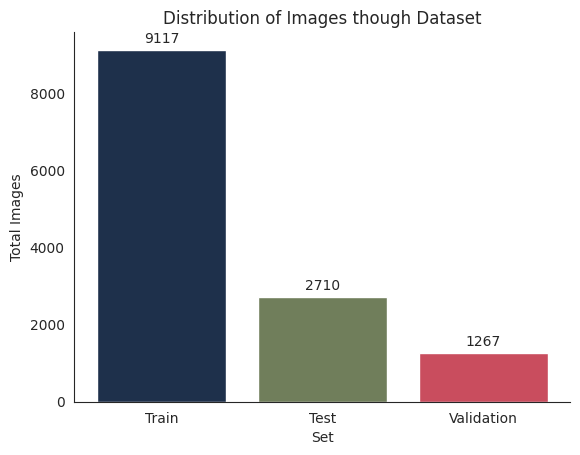

In [9]:
def collate_dataset(img_data_dir):
    counts = {}
    for folder in os.listdir(img_data_dir):
        folder_path = os.path.join(img_data_dir, folder)
        if os.path.isdir(folder_path):
            num_of_img = sum([len(files) for r, d, files in os.walk(folder_path)])
            counts[folder] = num_of_img
    return counts

num_of_train = collate_dataset(train_path)
num_of_test = collate_dataset(test_path)
num_of_validation = collate_dataset(validation_path)

all_counts = {
    'Train': sum(num_of_train.values()),
    'Test': sum(num_of_test.values()),
    'Validation': sum(num_of_validation.values())
}

fig, axes = plt.subplots()
bars = axes.bar(all_counts.keys(), all_counts.values(), color=['#1E304B', '#707E5B', '#C94D5E'])

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    axes.annotate('{}'.format(height),
    xy=(bar.get_x() + bar.get_width() / 2, height),
    xytext=(0, 3),
    textcoords='offset points',
    ha='center',
    va='bottom')

plt.title('Distribution of Images though Dataset')
plt.xlabel('Set')
plt.ylabel('Total Images')
plt.show()



### Test, Train and Validation Sets

In [10]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

In [11]:
batch_size = 35
train_set = augmented_image_data.flow_from_directory(
    train_path,
    color_mode = 'rgb',
    target_size = image_shape[:2],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True
)

train_set.class_indices

Found 9117 images belonging to 100 classes.


{'adonis': 0,
 'african_giant_swallowtail': 1,
 'american_snoot': 2,
 'an_88': 3,
 'appollo': 4,
 'arcigera_flower_moth': 5,
 'atala': 6,
 'atlas_moth': 7,
 'banded_orange_heliconian': 8,
 'banded_peacock': 9,
 'banded_tiger_moth': 10,
 'beckers_white': 11,
 'bird_cherry_ermine_moth': 12,
 'black_hairstreak': 13,
 'blue_morpho': 14,
 'blue_spotted_crow': 15,
 'brookes_birdwing': 16,
 'brown_argus': 17,
 'brown_siproeta': 18,
 'cabbage_white': 19,
 'cairns_birdwing': 20,
 'chalk_hill_blue': 21,
 'checquered_skipper': 22,
 'chestnut': 23,
 'cinnabar_moth': 24,
 'clearwing_moth': 25,
 'cleopatra': 26,
 'clodius_parnassian': 27,
 'clouded_sulphur': 28,
 'comet_moth': 29,
 'common_banded_awl': 30,
 'common_wood-nymph': 31,
 'copper_tail': 32,
 'crecent': 33,
 'crimson_patch': 34,
 'danaid_eggfly': 35,
 'eastern_coma': 36,
 'eastern_dapple_white': 37,
 'eastern_pine_elfin': 38,
 'elbowed_pierrot': 39,
 'emperor_gum_moth': 40,
 'garden_tiger_moth': 41,
 'giant_leopard_moth': 42,
 'glittering_

In [12]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_path,
    color_mode = 'rgb',
    target_size = image_shape[:2],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True
)

validation_set.class_indices

Found 1267 images belonging to 100 classes.


{'adonis': 0,
 'african_giant_swallowtail': 1,
 'american_snoot': 2,
 'an_88': 3,
 'appollo': 4,
 'arcigera_flower_moth': 5,
 'atala': 6,
 'atlas_moth': 7,
 'banded_orange_heliconian': 8,
 'banded_peacock': 9,
 'banded_tiger_moth': 10,
 'beckers_white': 11,
 'bird_cherry_ermine_moth': 12,
 'black_hairstreak': 13,
 'blue_morpho': 14,
 'blue_spotted_crow': 15,
 'brookes_birdwing': 16,
 'brown_argus': 17,
 'brown_siproeta': 18,
 'cabbage_white': 19,
 'cairns_birdwing': 20,
 'chalk_hill_blue': 21,
 'checquered_skipper': 22,
 'chestnut': 23,
 'cinnabar_moth': 24,
 'clearwing_moth': 25,
 'cleopatra': 26,
 'clodius_parnassian': 27,
 'clouded_sulphur': 28,
 'comet_moth': 29,
 'common_banded_awl': 30,
 'common_wood-nymph': 31,
 'copper_tail': 32,
 'crecent': 33,
 'crimson_patch': 34,
 'danaid_eggfly': 35,
 'eastern_coma': 36,
 'eastern_dapple_white': 37,
 'eastern_pine_elfin': 38,
 'elbowed_pierrot': 39,
 'emperor_gum_moth': 40,
 'garden_tiger_moth': 41,
 'giant_leopard_moth': 42,
 'glittering_

In [13]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    color_mode = 'rgb',
    target_size = image_shape[:2],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True
)

test_set.class_indices

Found 2710 images belonging to 100 classes.


{'adonis': 0,
 'african_giant_swallowtail': 1,
 'american_snoot': 2,
 'an_88': 3,
 'appollo': 4,
 'arcigera_flower_moth': 5,
 'atala': 6,
 'atlas_moth': 7,
 'banded_orange_heliconian': 8,
 'banded_peacock': 9,
 'banded_tiger_moth': 10,
 'beckers_white': 11,
 'bird_cherry_ermine_moth': 12,
 'black_hairstreak': 13,
 'blue_morpho': 14,
 'blue_spotted_crow': 15,
 'brookes_birdwing': 16,
 'brown_argus': 17,
 'brown_siproeta': 18,
 'cabbage_white': 19,
 'cairns_birdwing': 20,
 'chalk_hill_blue': 21,
 'checquered_skipper': 22,
 'chestnut': 23,
 'cinnabar_moth': 24,
 'clearwing_moth': 25,
 'cleopatra': 26,
 'clodius_parnassian': 27,
 'clouded_sulphur': 28,
 'comet_moth': 29,
 'common_banded_awl': 30,
 'common_wood-nymph': 31,
 'copper_tail': 32,
 'crecent': 33,
 'crimson_patch': 34,
 'danaid_eggfly': 35,
 'eastern_coma': 36,
 'eastern_dapple_white': 37,
 'eastern_pine_elfin': 38,
 'elbowed_pierrot': 39,
 'emperor_gum_moth': 40,
 'garden_tiger_moth': 41,
 'giant_leopard_moth': 42,
 'glittering_

### Save Class Indices

In [14]:
joblib.dump(
    value = train_set.class_indices,
    filename = f'{file_path}/class_indices.pkl'
)

['outputs/v1/class_indices.pkl']

---

# Model Creation

My Convolutional Neural Network will be made up of [NUMBER ] layers:
- [NUMBER ] convolution layers
- [NUMBER ] pooling layers 
- A single flatten layer
- A dense layer with a dropout layer that will drop [PERCENTAGE ] of the nodes, to prevent overfitting. 
- The output layer which uses the softmax activation function to output probabilities for each class.
- Finally a compling layer, using the loss function categorical crossentropy, as is common with multiclass classification; the adam optimizer, and the accuracy metric. 

In [15]:
def create_ml_model():

    model = Sequential()
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


### Model Summary

In [16]:
create_ml_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

2024-03-24 03:33:35.320471: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Early Stopping Callback

In [17]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')
model_checkpoint = ModelCheckpoint(
    filepath='outputs/v1/butterfly_classification_model.h5',
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True
)

### Fitting the Model

In [18]:
model = create_ml_model()

model.fit(
    train_set,
    epochs = 32,
    steps_per_epoch = len(train_set.classes) // batch_size,
    validation_data = validation_set,
    callbacks = [early_stop, model_checkpoint],
    verbose = 1
)

2024-03-24 03:33:35.871530: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/26
227/227 [==============================] - 399s 2s/step - loss: 4.4872 - accuracy: 0.0180 - val_loss: 4.1161 - val_accuracy: 0.0426
Epoch 2/26
227/227 [==============================] - 455s 2s/step - loss: 4.0274 - accuracy: 0.0628 - val_loss: 3.5879 - val_accuracy: 0.1302
Epoch 3/26
227/227 [==============================] - 459s 2s/step - loss: 3.6497 - accuracy: 0.1124 - val_loss: 3.2323 - val_accuracy: 0.1902
Epoch 4/26
227/227 [==============================] - 468s 2s/step - loss: 3.3087 - accuracy: 0.1647 - val_loss: 2.7930 - val_accuracy: 0.2920
Epoch 5/26
227/227 [==============================] - 403s 2s/step - loss: 2.9968 - accuracy: 0.2312 - val_loss: 2.6178 - val_accuracy: 0.3125
Epoch 6/26
227/227 [==============================] - 388s 2s/step - loss: 2.7276 - accuracy: 0.2854 - val_loss: 2.2840 - val_accuracy: 0.3954
Epoch 7/26
227/227 [==============================] - 379s 2s/step - loss: 2.4638 - accuracy: 0.3380 - val_loss: 2.0266 - val_accuracy: 0.4578

### Save the Model

In [19]:
model.save('outputs/v1/malaria_detector_model.h5')

---

# Model Performance

---

# Model Evaluation

### Load Model

---

# Predict New Data

---

# Model Perameters / Hyperperameters

## 1st Instance:
- Conv2D layers (32, 64, 64, 128)
- Op (adam)
- Batch Size (20)
- Epoch (20)
#### Model accuracy unacceptable - 66%

## 2nd Instance:
- Conv2d layers (32, 64, 64, 128, 256)
- Op (adam)
- Batch Size (40)
- Epoch (26)
  - 1st Epoch: Loss - 4.49 Accuracy - 0.018 val_loss - 2.79 val_accuracy - 0.043
  - 10th Epoch: Loss - 1.92 Accuracy - 0.46 val_loss - 1.54 val_accuracy - 0.59
  - 20th Epoch: Loss - 1.21 Accuracy - 0.65 val_loss - 0.99 val_accuracy - 0.73
  - 26th Epoch: Loss - 1.02 Accuracy - 0.70 val_loss - 0.88 val_accuracy - 0.75
#### Model accuracy unacceptable

## 2nd Instance:
- Conv2d layers (64, 64, 128, 128, 256)
- Op (adam)
- Batch Size (35)
- Epoch (32)